# Untitled Supermarked Project
Goal of the project is to gain insights on retail behaviour combining Data Science and Queuing Theory.

## Setting up Workshop

### Importing Libraries

In [18]:
# DataFrames
import pandas as pd
# Visualizations
import matplotlib.pyplot as plt
# Fancy Visualizations
import seaborn as sns

## 01 : Import Data

Source: https://www.kaggle.com/agasca/retail-sales/data

In [2]:
data_raw = pd.read_csv(filepath_or_buffer = "Sales.csv")

## 02 : Clean Data
|Input|Tools & Techniques|Output|
|-|-|-|
|Raw Data|Select Features|Clean Data|
||Rename Features||
||Handle Feature Format||


The dataset has no missing values.

### 02-01 : Select Features
The Dataset consists of 5 features: 'Folio', 'Hora', 'Total', 'Pago', and 'Cajero'. The first one bears no usefull information and will therefore be dropped.

In [3]:
data_cln = data_raw.drop('Folio', axis = 1)

### 02-02 : Rename Features
The 4 remaining Features will be translated for transparancy.

In [4]:
data_cln.columns = ['time','price','paid','cashier']

### 02-03 : Handle Feature Format
Turning the 'time' feature into timestamp.

In [5]:
data_cln.time = pd.to_datetime(data_cln.time, format='%Y-%m-%d %H:%M:%S')

## 03 : Data Analysis
|Input|Tools & Techniques|Output|
|-|-|-|
|Clean Data|Single Feature Analysis|Insights|
||Multiple Feature Analysis|Assumptions|

In [65]:
plt.rcParams['figure.figsize'] = [10, 5]

### 03-01 : Single Feature Analysis

#### 03-01-01 : Time

In [6]:
print("Dataset spans from",
      data_cln.time.min(),
      "to",data_cln.time.max(),
      ". A timeperiod of",
      data_cln.time.max()-data_cln.time.min(),
      ".")

Dataset spans from 2018-05-01 07:46:22 to 2018-08-31 21:13:28 . A timeperiod of 122 days 13:27:06 .


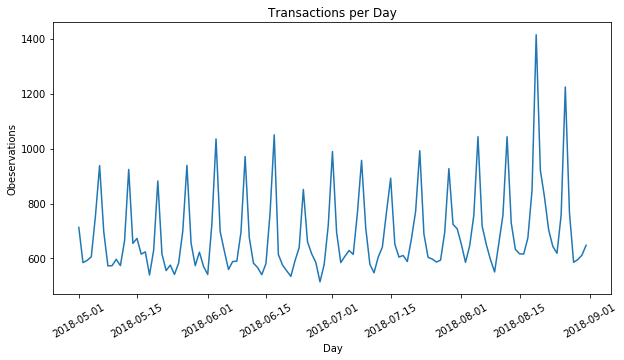

In [289]:
plt.title("Transactions per Day")
plt.plot(data_cln.resample("d", on = "time").count()["time"])
plt.ylabel("Obeservations")
plt.xlabel("Day")
plt.xticks(rotation = 30)
plt.show()

<b>Insights:</b><br>
- The market has between 500 and 1450 transactions every day.<br>
- There is a repeating pattern.<br>

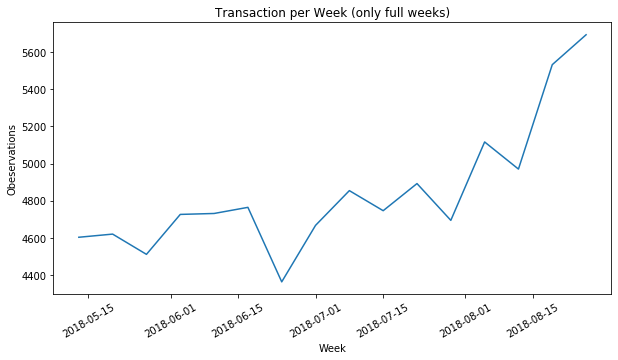

In [288]:
plt.title("Transactions per Week (only full weeks)")
plt.plot(data_cln.resample("W", on = "time").count()["time"][1:-1])
plt.ylabel("Transactions")
plt.xlabel("Week")
plt.xticks(rotation = 30)
plt.show()

<b>Insights:</b><br>
- The market has between 4350 and 5700 transactions every week.<br>
- It is stable around a 4600 transaction average for the first 10/11 weeks.
- But the number of transactions rises.<br>

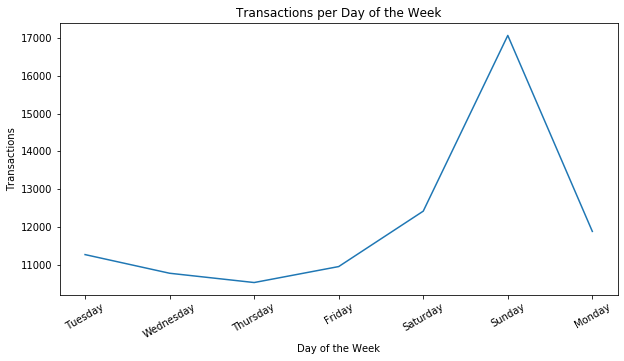

In [291]:
plt.title("Transactions per Day of the Week")
plt.plot(data_cln.groupby(data_cln.time.dt.day_name(), sort = False).time.count())
plt.ylabel("Transactions")
plt.xlabel("Day of the Week")
plt.xticks(rotation = 30)
plt.show()

<b>Insights:</b><br>
- All Workdays of the week have between 10000 and 12000 transactions.<br>
- All Saturdays saw a rough total of 12500, while the sum of Sunday transactions exceeds 17000.<br>
- The Minimum is in Thursday, the Maximum on Sunday.<br>
- The numbers rise and fall steadily from minimun and maximum and back<br>

#### 03-01-02 : Price

In [299]:
data_cln.price.describe()

count    84881.000000
mean       189.781109
std        284.032620
min      -1772.900000
25%         38.000000
50%         95.000000
75%        227.700000
max      13263.900000
Name: price, dtype: float64

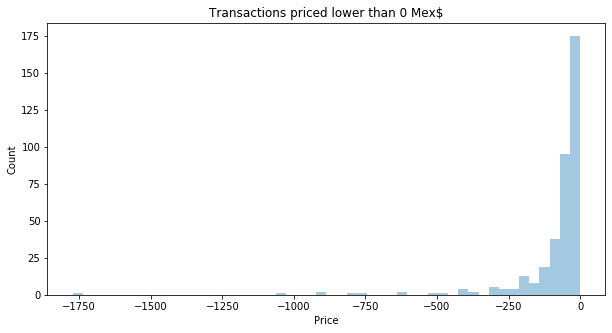

In [303]:
plt.title("Transactions priced lower than 0 Mex$")
sns.distplot(data_cln.price[data_cln.price <= 0] , kde = False)
plt.ylabel("Count")
plt.xlabel("Price")
plt.show()

<b>Insights:</b><br>
- There are transactions with a negative ammount of Mex$.<br>

<b>Assumptions:</b><br>
- These transactions represent instances where the price of the items bought is exceeded by the worth of items handed in (f.e. bottles for recycling).<br>

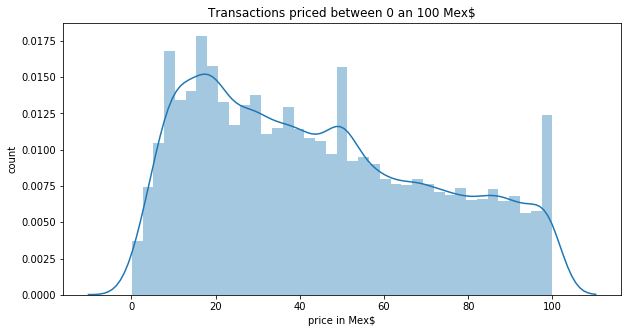

In [308]:
plt.title("Transactions priced between 0 an 100 Mex$")
sns.distplot(data_cln.price[(data_cln.price>=0)&(data_cln.price<=100)])
plt.ylabel("count")
plt.xlabel("price in Mex$")
plt.show()

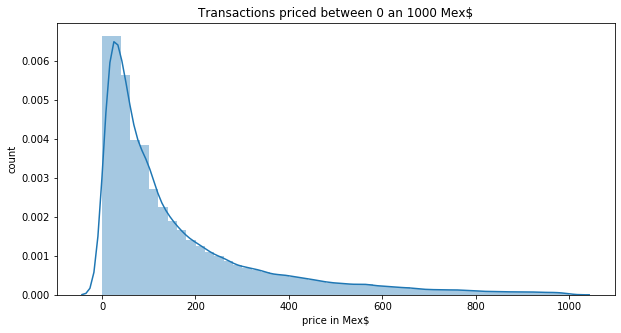

In [310]:
plt.title("Transactions priced between 0 an 1000 Mex$")
sns.distplot(data_cln.price[(data_cln.price>=0)&(data_cln.price<=1000)])
plt.ylabel("count")
plt.xlabel("price in Mex$")
plt.show()

<b>Insights:</b><br>
- The price seems to be normally distributed with the peak around 18 Mex$ and a heavy positive skew.<br>

#### 03-01-02 : Paid

#### 03-01-03 : Cashiers

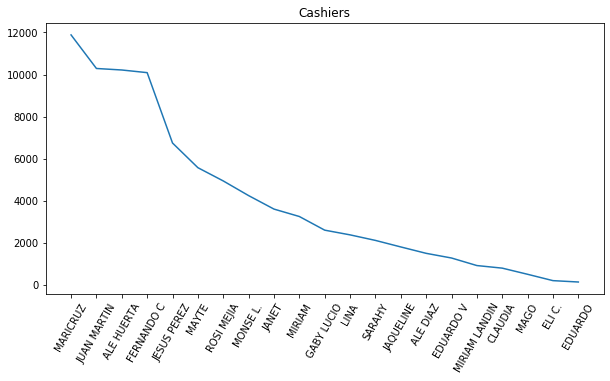

In [293]:
plt.title("Cashiers")
plt.plot(data_cln.cashier.value_counts())
plt.xticks(rotation = 60)
plt.show()

<b>Insights:</b><br>
- 21 Cashiers have been working in that supermarked in the timeperiod.<br>
- 4 of them have checked out more than 10k Transactions. The rest have all less than 7000 Transactions. <br>

### 03-02 : Multiple Feature Analysis

In [ ]:
# Correlations

In [ ]:
# Time vs Paid

In [ ]:
# Time vs Price

In [ ]:
# Time vs Cashier

In [ ]:
# Paid vs Price

In [ ]:
# Paid vs Cashier

In [ ]:
# Comment: Effects of Daylight Savingstime

In [ ]:
# Price vs Cashier

## Future Works

- "Observations per Week (only full weeks)" apply .isocalendar()[1]<br>
- Add Histograms to 03-01-01<br>
- Create common Vocabulary<br>
- Create Multiplot for 03-01-02<br>

- Reformat Data to "cashier shift" by combining groupby() and resample(), try those "\".<br>
- Finish Analysis<br>
- Come up with Supermarket related pun as project title<br>
- Consider Visualizations via Bookeh<br>
- Long and Short Jupyter Notebooks<br>